In [10]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(14, 6))

In [11]:
data = pd.read_csv('../extra/data/aluguel_amostra.csv', sep=';')
data.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento


In [12]:
valor_m2 = data['Valor m2']

In [13]:
print(q1 := valor_m2.quantile(0.25))
print(q3 := valor_m2.quantile(0.75))
print(iiq := (q3 - q1).round(2))
print(limite_inferior := (q1 - 1.5 * iiq).round(2))
print(limite_superior := (q3 + 1.5 * iiq).round(2))

21.25
42.31
21.06
-10.34
73.9


Mostre o código necessário para gerar os gráficos da figura a seguir:

<img src='../extra/data/compressed_grafico.png'>    

Neste exercício, estamos apresentando o gráfico de pizza que pode ser obtido com a aplicação do método pie(), de matplotlib.

Text(0.5, 1.0, 'Total de Imóveis por Tipo')

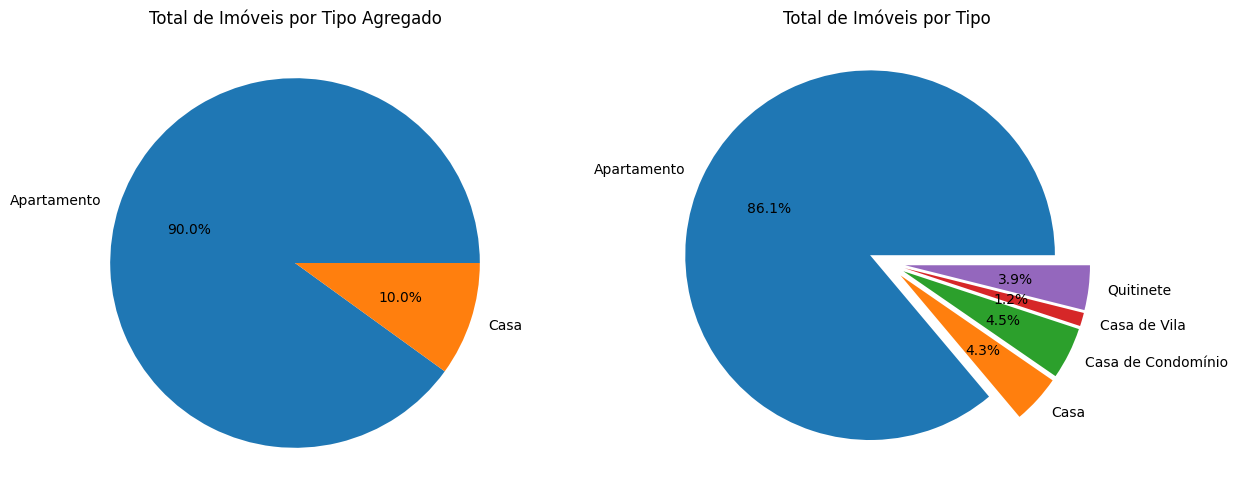

In [17]:
area = plt.figure()
g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)
grupo1 = data.groupby('Tipo Agregado')['Valor']
label = grupo1.count().index
valores = grupo1.count().values
g1.pie(valores, labels = label, autopct='%1.1f%%')
g1.set_title('Total de Imóveis por Tipo Agregado')
grupo2 = data.groupby('Tipo')['Valor']
label = grupo2.count().index
valores = grupo2.count().values
g2.pie(valores, labels = label, autopct='%1.1f%%', explode = (.1, .1, .1, .1, .1))
g2.set_title('Total de Imóveis por Tipo')